# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

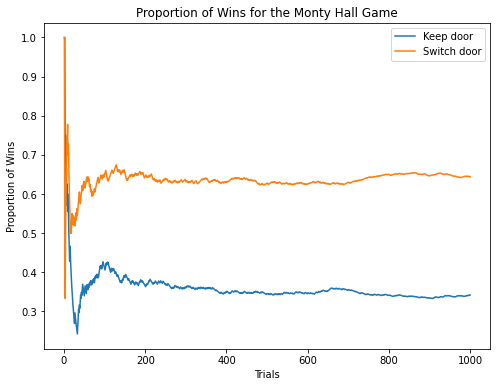

In [6]:
# Deliverable
# Be sure to run all code block below before running this block.

plot_win_proportion(1000);

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Game play code

def get_random_door(doors):
    """Given a list of doors, select one uniformly at random."""
    return np.random.choice(doors)

def is_winner(choice, car):
    """Given the player's choice and the location of the car, determine if the player has won. Returns boolian."""
    return choice == car

def drop_choice(choice, doors):
    """Given a list of doors and the playes choice, return a list of unopened doors."""
    closed_doors = [x for x in doors if x != choice]
    return closed_doors

def update_choice(choice, car, doors):
    """Given a list of doors, the position of the car, and the players choice, select a new door"""
    if not is_winner(choice, car):
        closed_doors = drop_choice(choice, doors)
        choice = get_random_door(closed_doors)
    return choice
        

def play_game(doors, use_information=False):
    """Given a list of doors and stratigy, play one instance of the Monty Hall game."""
    car = get_random_door(doors)
    choice = get_random_door(doors)
    if use_information:
        choice = update_choice(choice, car, doors)
    return is_winner(choice, car)


In [3]:
# Simulation code
def simulate_games(number_of_trials):
    doors = [1, 2, 3]
    games_list = []
    wins1 = 0
    proportion1 = 0
    wins2 = 0
    proportion2 = 0
    for k in range(number_of_trials):
        trial = k+1
        wins1 += play_game(doors=doors, use_information=False)
        proportion1 = wins1/trial
        wins2 += play_game(doors=doors, use_information=True)
        proportion2 = wins2/trial
        game = {
            'trial': trial,
            'proportion1': proportion1,
            'proportion2': proportion2
        }
        games_list.append(game)
    df = pd.DataFrame(games_list)
    return df

In [4]:
# Plot code
def plot_win_proportion(number_of_trials):
    import matplotlib.pyplot as plt 
    df = simulate_games(number_of_trials)
    plt.figure(figsize=(8, 6))
    plt.plot('trial', 'proportion1', data=df)
    plt.plot('trial', 'proportion2', data=df)
    plt.legend(labels=['Keep door', 'Switch door'])
    plt.xlabel('Trials')
    plt.ylabel('Proportion of Wins')
    plt.title('Proportion of Wins for the Monty Hall Game')

In [ ]:
# Test plot_win_proportions 

plot_win_proportion(20)

In [ ]:
# Test simulate_games
def run_test():
    np.random.seed(42)
    ref_list =[
        {'trial': 1, 'proportion1': 0.0, 'proportion2': 1.0},
        {'trial': 2, 'proportion1': 0.5, 'proportion2': 0.5},
        {'trial': 3, 'proportion1': 0.6666666666666666,'proportion2': 0.6666666666666666},
        {'trial': 4, 'proportion1': 0.5, 'proportion2': 0.5},
        {'trial': 5, 'proportion1': 0.6, 'proportion2': 0.6},
        {'trial': 6, 'proportion1': 0.6666666666666666, 'proportion2': 0.6666666666666666},
        {'trial': 7, 'proportion1': 0.5714285714285714, 'proportion2': 0.7142857142857143},
        {'trial': 8, 'proportion1': 0.5, 'proportion2': 0.75},
        {'trial': 9,'proportion1': 0.4444444444444444,'proportion2': 0.7777777777777778},
        {'trial': 10, 'proportion1': 0.4, 'proportion2': 0.8}
    ]
    ref_df = pd.DataFrame(ref_list)
    df = simulate_games(10)
    return df == ref_df
run_test()

In [ ]:
# Set up testing environment
import matplotlib.pyplot as plt
doors = [1, 2, 3]
number_of_samples = 1000
car = 1
choice1 = 1
choice2 = 2

In [ ]:
# Test random_door

def sample_doors():
    doors_list = []
    for n in range(number_of_samples):
        doors_list.append(get_random_door(doors))
    return doors_list

def make_frequency_dict_from_list(lst):
    freq = dict()
    for x in lst:
        freq[x] = freq.get(x, 0) + 1
    return freq

def make_bar_plot(door_list):
    freq = make_frequency_dict_from_list(door_list)
    x = freq.keys()
    height = freq.values()
    plt.bar(x, height=height)
    plt.title(f'Barplot of {len(door_list)} randomly selected doors')

def run_test():
    door_list = sample_doors()
    make_bar_plot(door_list)
    
run_test()

In [ ]:
#Test winner

def run_test():
    return (is_winner(choice1, car) == True) & (is_winner(choice2, car) == False)
run_test()

In [ ]:
# Test drop_choice

def run_test():
    return (drop_choice(doors=doors, choice=1) == [2, 3])

run_test()

In [ ]:
# Test update_choice
def run_test():
    return (update_choice(choice1, car, doors) == choice1) & (update_choice(choice2, car, doors) != choice2)

run_test()

In [ ]:
# Test play game
def run_test():
    np.random.seed(42)
    ref_list =[(False, True),
               (True, False),
               (True, True),
               (False, False),
               (True, True),
               (True, True),
               (False, True),
               (False, True),
               (False, True),
               (False, True)
              ]
    outcome_list = []
    for n in range(10):
        test1 = play_game(doors, use_information=False)
        test2 = play_game(doors, use_information=True)
        outcome_list.append((test1, test2))   
    return outcome_list == ref_list

run_test()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 